# Machine Learning:  decision tree

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize'] = [15, 10]
from IPython.display import Image

For a moment, imagine that you are not a flower expert (if you are an expert, good for you!). Can you distinguish between three different species of iris — setosa, versicolor, and virginica?

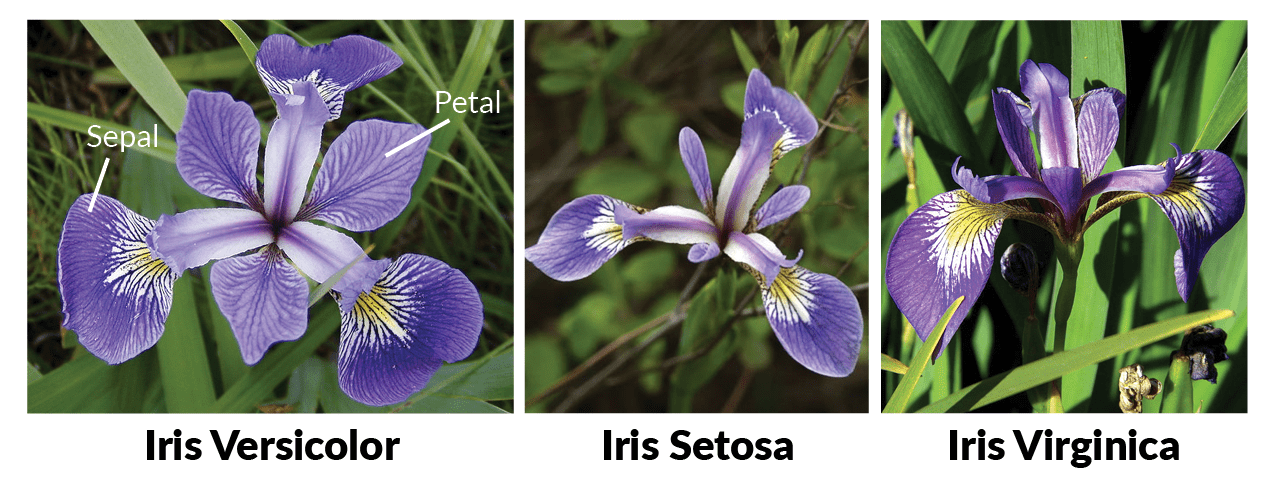

In [8]:
Image(filename='data/iris-machinelearning.png')

In [9]:
data = pd.read_csv('data/iris.csv')

In [12]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 150 instances with 4 attributes (same units, all numeric)
* Balanced class distribution
* No missing data


In [13]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

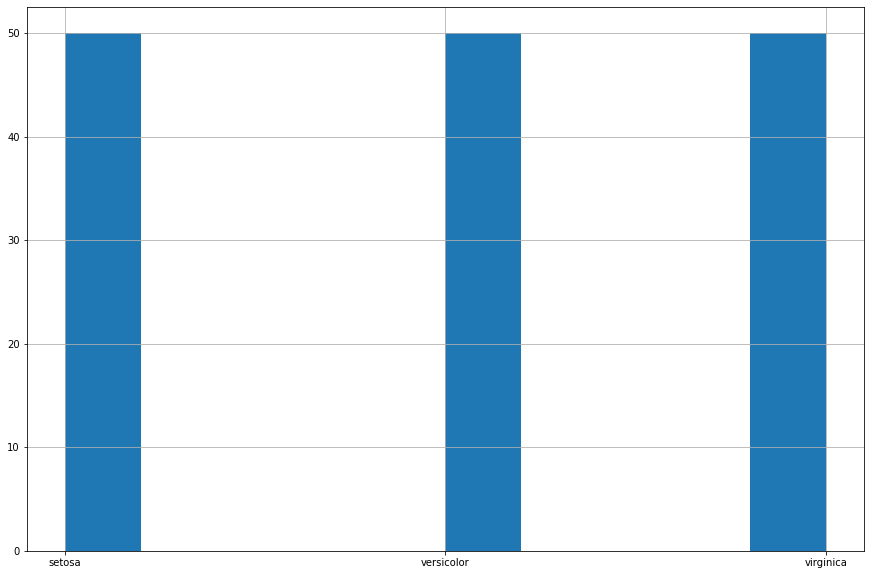

In [15]:
data.species.hist();

## Objectives
There are two questions that we want to be able to answer after exploring this dataset, which are quite typical in classification problems:
1. Prediction — given new data points, how accurately can the model predict their classes (species)?
2. Inference — Which predictor(s) can effectively help with the predictions?


## Train-Test Split
Now, we can split the dataset into a training set and a test set. Usually, we should also have a validation set, which is used to evaluate the performance of each classifier, fine-tune, and determine the best model. The test set is mainly used for reporting. However, due to the small size of this dataset, we can simplify it by using the test set to serve the purpose of the validation set.

In [46]:
train, test = train_test_split(data, test_size = 0.02, stratify = data['species'], random_state = 42)

## Exploratory Data Analysis
After we split the dataset, we can go ahead to explore the training data. 

Let’s first create some univariate plots. Create a histogram for each feature:

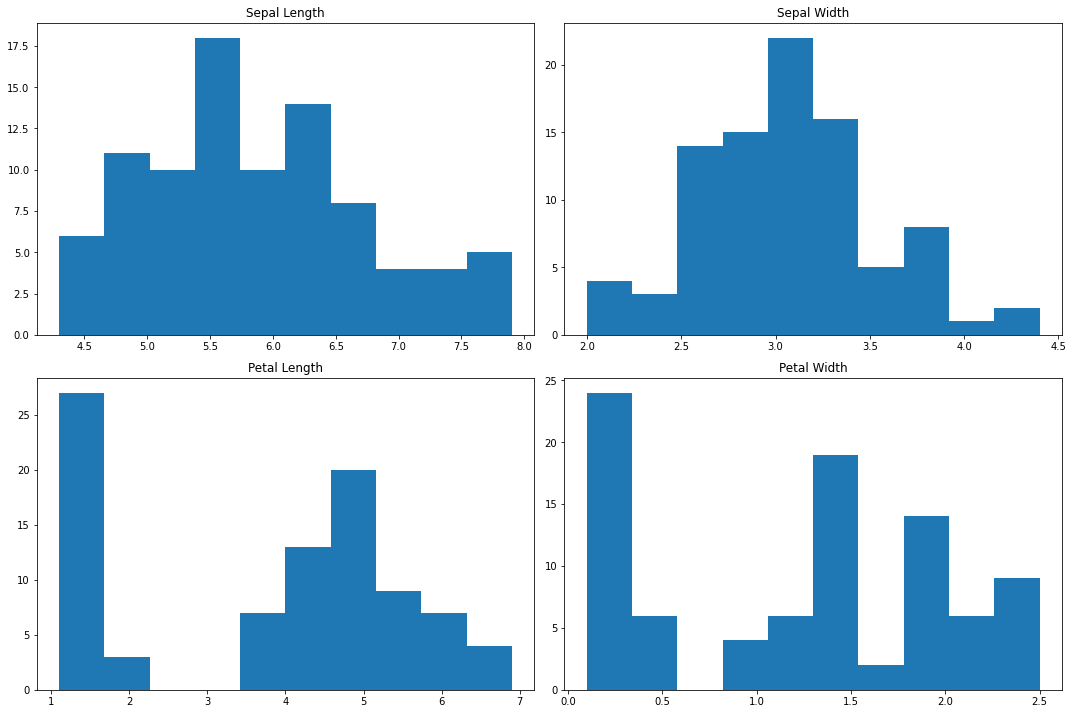

In [20]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

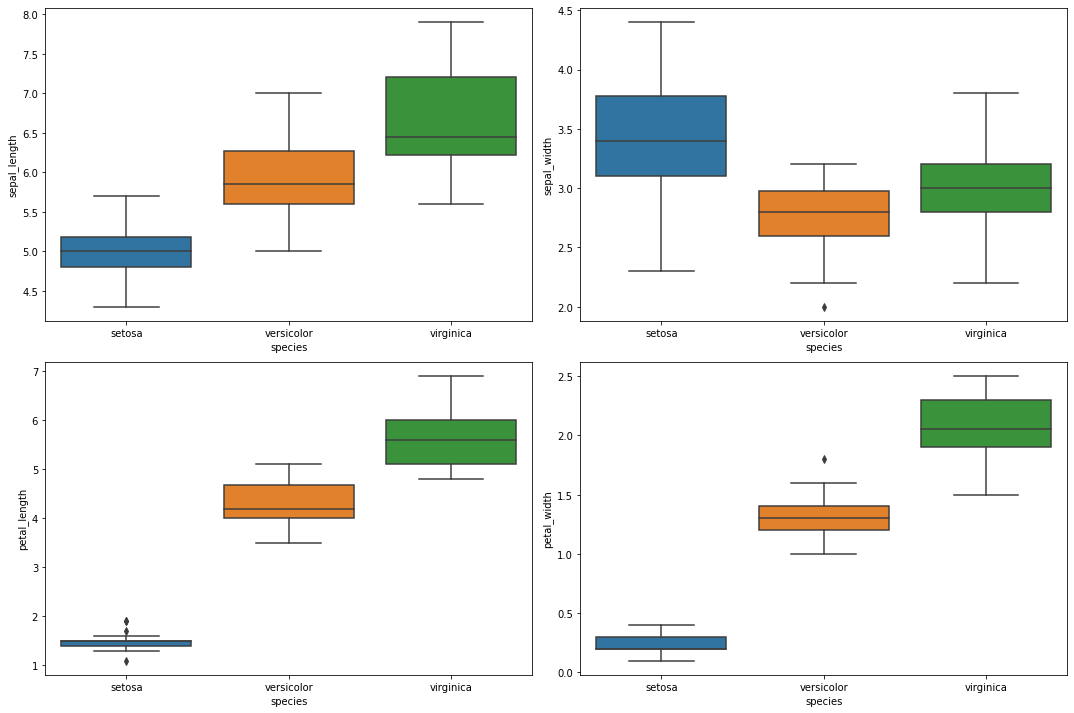

In [23]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

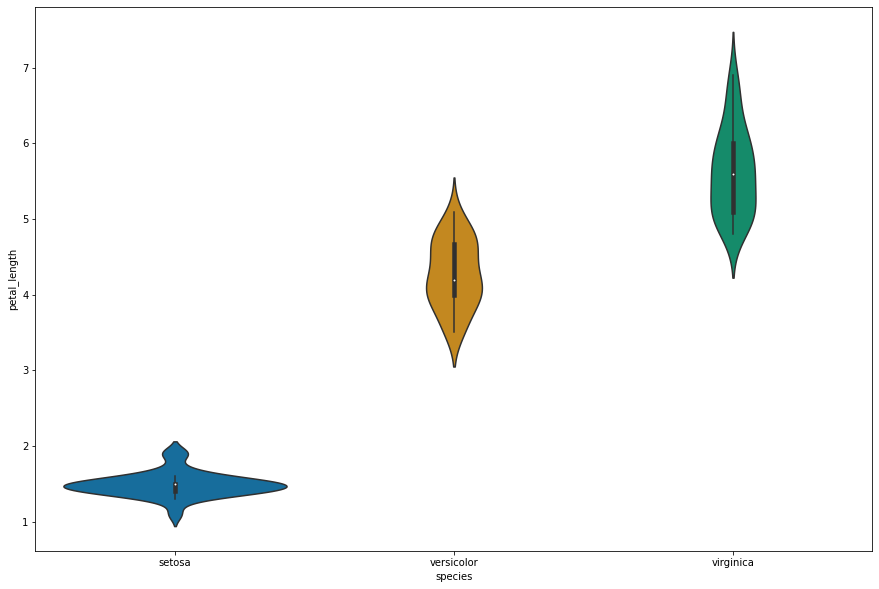

In [24]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

The two plots at the bottom suggest that that group of data points we saw earlier are setosas. Their petal measurements are smaller and less spread-out than those of the other two species as well. Comparing the other two species, versicolor has lower values than virginica on average.

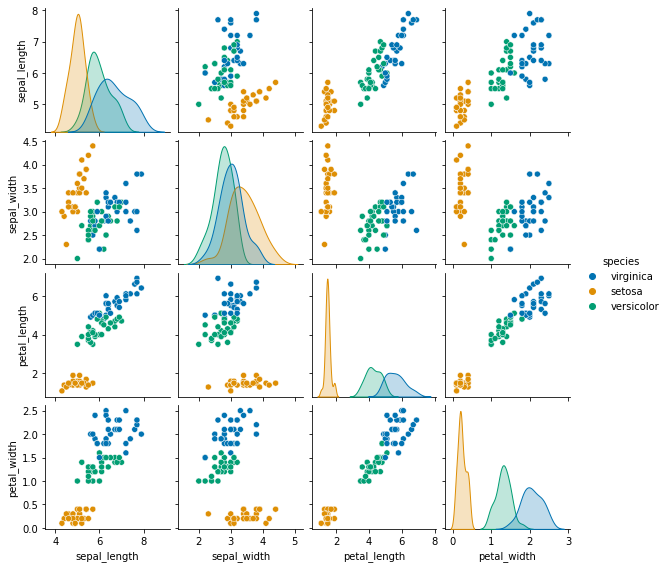

In [25]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

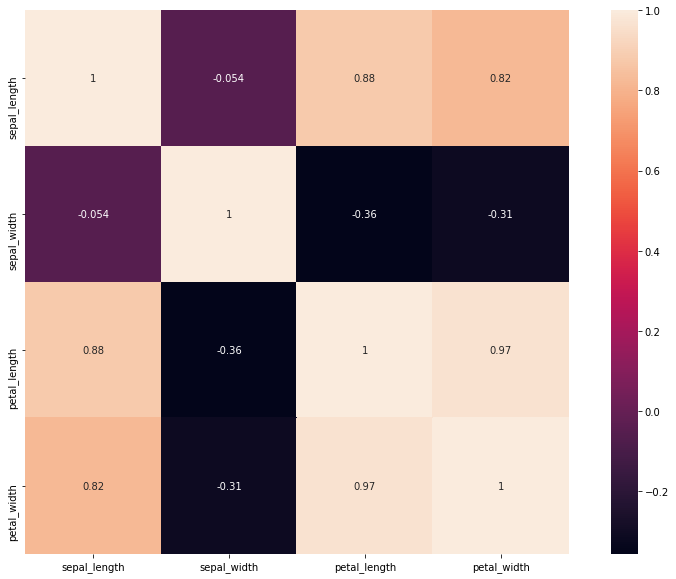

In [13]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

## Build Classifiers
Now we are ready to build some classifiers (woo-hoo!)
To make our lives easier, let’s separate out the class label and features:

In [47]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

## Classification Tree
The first classifier that comes up to my mind is a discriminative classification model called classification trees. The reason is that we get to see the classification rules and it is easy to interpret.


In [48]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 1.000


This decision tree predicts 98.3% of the test data correctly. One nice thing about this model is that you can see the importance of each predictor through its feature_importances_ attribute:

In [49]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.05491713, 0.94508287])

From the output and based on the indices of the four features, we know that the first two features (sepal measurements) are of no importance, and only the petal ones are used to build this tree.

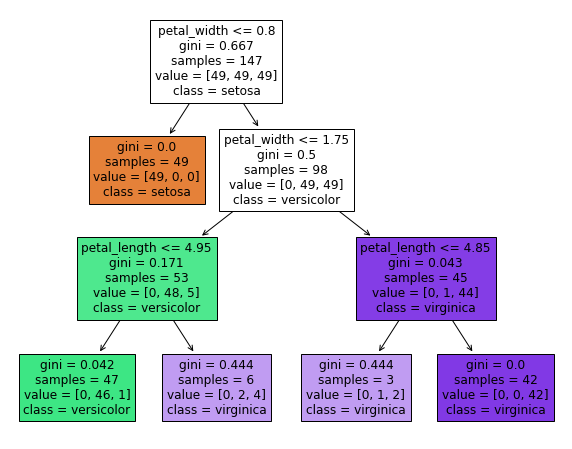

In [50]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

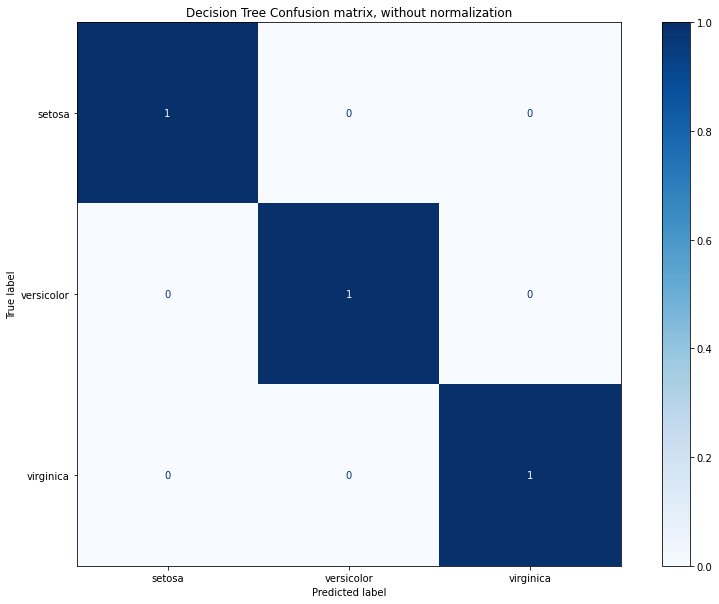

In [51]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

Through this matrix, we see that there is one versicolor which we predict to be virginica.
One downside is building a single tree is its instability, which can be improved through ensemble techniques such as random forests, boosting, etc. For now, let’s move on to the next model.